<a href="https://colab.research.google.com/github/Lin-Sinorodin/SwinIR_wrapper/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrapper for SwinIR

> Demo notebook for [__Wrapper for SwinIR__](https://github.com/Lin-Sinorodin/SwinIR_wrapper) repository. This wrapper based on the official PyTorch implementation of [SwinIR: Image Restoration Using Shifted Window Transformer](https://arxiv.org/abs/2108.10257). Check the repo for more details.





In [ ]:
#@title Imports and Utils { display-mode: "form" }

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.figsize': (10.0, 10.0)}

!git clone -qq https://github.com/Lin-Sinorodin/SwinIR_wrapper.git
!pip install -qq timm
from SwinIR_wrapper import SwinIR_SR

import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    print(f'Using GPU: {torch.cuda.get_device_properties(0).name}')
else:
    print('Using CPU. Concider using GPU for faster inference.')

def compare_sr_with_original(img_lq, img_hq):
    plt.figure()

    plt.subplot(1, 2, 1)
    plt.imshow(img_lq[::,::,::-1])
    plt.title(f'Original - {img_lq.shape}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_hq[::,::,::-1])
    plt.title(f'Super Resolution - {img_hq.shape}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

fatal: destination path 'SwinIR_wrapper' already exists and is not an empty directory.
Using GPU: Tesla K80




---



In [ ]:
#@title Get Test Image { run: "auto", display-mode: "form" }

#@markdown > #### Choose between uploading image or downloading from url:
get_image_method = "download from url" #@param ["upload file", "download from url"]

#@markdown * for uploaded image, write it's path:
uploaded_file = "/content/my_uploaded_image.jpeg" #@param {type:"string"}
if get_image_method == 'upload file':
    path = uploaded_file

#@markdown * for url download, provide the image url:
url = 'https://map.pepperdine.edu/maps/UMAP_2011012422072_6_8_19.jpg' #@param {type:"string"}
if get_image_method == 'download from url':
    path = url.split('/')[-1]
    urllib.request.urlretrieve(url, path)



---



In [ ]:
#@title Setup Super Resolution Model { run: "auto" }
pretrained_model = "real_sr x4" #@param ["real_sr x4", "classical_sr x2", "classical_sr x3", "classical_sr x4", "classical_sr x8", "lightweight x2", "lightweight x3", "lightweight x4"]

model_type, scale = pretrained_model.split(' ')
scale = int(scale[1])

# initialize super resolution model
sr = SwinIR_SR(model_type, scale)

print(f'Loaded {pretrained_model} successfully')

downloading weights to /content/SwinIR_wrapper/weights/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
Loaded real_sr x4 successfully




---



## Use The Model

> If the image size isn't too big, the image can be fed to the model as it is However, for larger images the GPU will run out of memory. A simple solution is to use the model on smaller patches and then combine the results for a large image.

### Directly - `sr.upscale()`


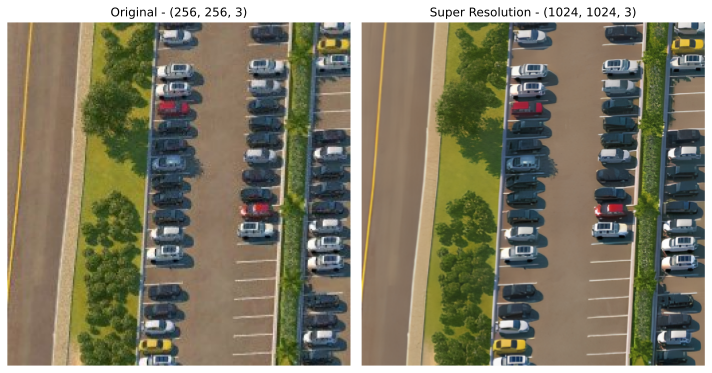

In [ ]:
# load the test image from previus step
img_lq = cv2.imread(path, cv2.IMREAD_COLOR)

# feed the image to the SR model
img_hq = sr.upscale(img_lq)                  

# show results
compare_sr_with_original(img_lq, img_hq)     

### On Patches - `sr.upscale_using_patches()`

Performing SR on patches:   0%|          | 0/16 [00:00<?, ?patch/s]

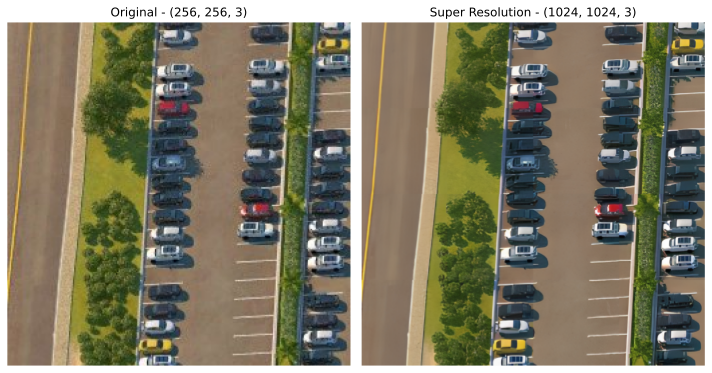

In [ ]:
# load the test image from previus step
img_lq = cv2.imread(path, cv2.IMREAD_COLOR)

# feed the image to the SR model
img_hq = sr.upscale_using_patches(img_lq, slice_dim=64, keep_pbar=True)

# show results
compare_sr_with_original(img_lq, img_hq)